## Intoduction
link to competition: [digit recogniger competition](https://www.kaggle.com/c/digit-recognizer)

My Kaggle Profile: [Amit Vikram | Kaggle](https://www.kaggle.com/amitkvikram)

- It gives me immense pleasure to launch this kernel. For your sake convenience I got accuracy of **0.98442**.

- Here we will use PCA for dimensionality reduction and then train the data using "Logistic Regression with solver lbfgs" and  "SVM". 

## 1. Import data

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import warnings
warnings.filterwarnings('ignore')
Train = pd.read_csv("train.csv").values
Test = pd.read_csv("test.csv").values

In [2]:
Train.shape

(42000, 785)

In [3]:
Test.shape

(28000, 784)

In [29]:
X = (Train[:,1:])
Y = (Train[:,0])

## 2. Dimensionality Reduction using PCA

#### a. Plot graph of component vs. cumulative explained variance .
This graph will help us in choosing the no of components for training our data.

(42000, 412)


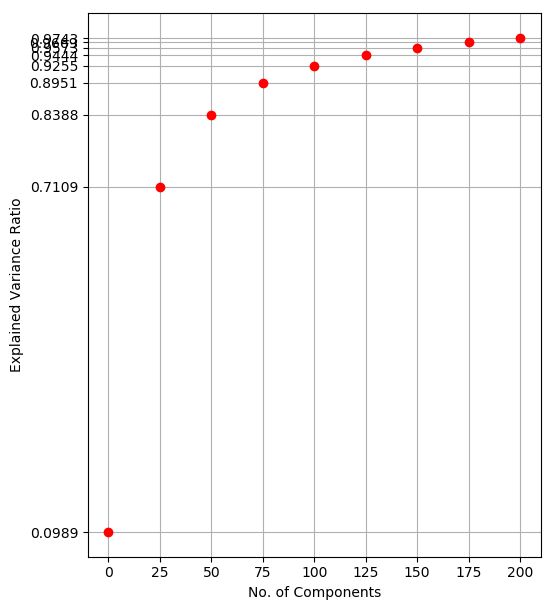

In [30]:
from sklearn.decomposition import PCA
# ## Removing the column with variance 0
variance = np.var(X, axis = 0)>1000
X = X[:, variance]
Test = Test[:,variance]
print(X.shape)
# ##Calculate Principal Components
pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
# ##Calculate cumulative explained ration
cum_explained_variance = [np.sum(explained_variance[:i+1]) for i in range (0, 201, 25)]
X_axis = [i for i in range(0, 201,25)]

##Plot Graph
fig = plt.figure(figsize = (5.841, 7.195), dpi=100)
plt.plot(X_axis, cum_explained_variance, 'ro')
plt.grid(True, which = 'both')
plt.yticks(cum_explained_variance)
plt.xticks(X_axis)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("No. of Components")
plt.show()

**So Looking on the above graph, 50 components comprise 80% variance. So first we will go with 50 componets**

### Splitting data for training and testing
- Training data: 80%
- Test data: 20%

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size  = 0.20, random_state  = 0)

### define normalize function for normalizing the data, PrincipalComponents function to return top n principal components.

In [32]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

def normalize(sigma2, mean2, X):
    X = (X-mean2)/sigma2
    return X

def PolynomialFeatures1(X):
    X_2 = np.square(X)
    X = np.column_stack((X, X_2))
    return X

J1 = []
J2 = []

##Take n principal components
def PrincipalComponents(n):
    pca = PCA(n_components= n)
    X_train1 = pca.fit_transform(X_train)
    X_test1 = pca.transform(X_test)
    return X_train1, X_test1

## Logistic Regression

def LogisticRegression(X_train2, y_train2, X_test2, y_test2, penalty):
    print("penalty= ", penalty)
    regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=penalty)
    regr.fit(X_train2, y_train2)
    score1 = regr.score(X_train2, y_train2)
    score2 = regr.score(X_test2, y_test2)
    print(score1, score2)
    Prediction = regr.predict(X_test2)
    return score1, score2, Prediction


**So usually variance of 0.8 is sufficient to explain the variation in data, so we will first train data by taking the top n principal components which can explaine the variance of 0.8**

penalty=  0.1
0.891455427229 0.895357142857
penalty=  0.1
0.892290843293 0.895952380952
penalty=  0.1
0.893004863415 0.895833333333
penalty=  0.1
0.893308986566 0.895238095238
penalty=  0.1
0.892629473772 0.895833333333
penalty=  0.1
0.893284268629 0.895595238095
penalty=  0.1
0.892657974693 0.895833333333
penalty=  0.1
0.892522499167 0.894404761905
penalty=  0.1
0.892789543231 0.895357142857
penalty=  0.1
0.892693355402 0.895952380952
penalty=  0.1
0.892503583214 0.895357142857
penalty=  0.1
0.891906712687 0.895476190476
penalty=  0.1
0.892378363176 0.895476190476
penalty=  0.1
0.89203357474 0.895714285714


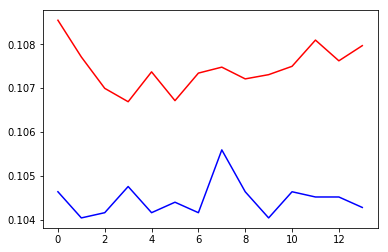

In [34]:
X_train1, X_test1 = PrincipalComponents(0.8)   # Getting principal components
J1 = []
J2 = []
for i in range(20000, X_train1.shape[0], 1000):
    score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:], y_train[:i+1, ], 
                                                    X_test1[:i+1,:], y_test[:i+1], 0.1)
    J1.append(1-score1)
    J2.append(1-score2)
    
    
plt.plot(J2, 'b-')
plt.plot(J1, 'r-')
plt.show()

- We got a very irregular graph and not a satisfied accuracy and the accuracy doesn't increase with the increaing training data. So it seems that we are suffering from a high bias. Let us try to train data with top n components explaining the variance of 0.9

penalty=  0.1
0.910604469777 0.908571428571
penalty=  0.1
0.911538998186 0.909047619048
penalty=  0.1
0.911656014956 0.909047619048
penalty=  0.1
0.910819966532 0.907857142857
penalty=  0.1
0.910734202531 0.907261904762
penalty=  0.1
0.910475982692 0.908452380952
penalty=  0.1
0.91014102962 0.908214285714
penalty=  0.1
0.910494737877 0.90880952381
penalty=  0.1
0.910096559483 0.909285714286
penalty=  0.1
0.909763887645 0.908928571429


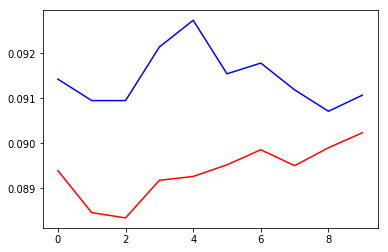

In [37]:
X_train1, X_test1 = PrincipalComponents(0.9)
J1 = []
J2 = []
for i in range(10000, X_train1.shape[0], 1500):
    score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:],
                                                    y_train[:i+1, ], X_test1[:i+1,:], y_test[:i+1],0.1)
    J1.append(1-score1)
    J2.append(1-score2)
    
    
plt.plot(J2, 'b-')
plt.plot(J1, 'r-')  #training error
plt.show()

** We can see that accuracy didn't increase much so it doesn't seems a gud idea. Let us again take top n components explaining the variance of 0.8 and also include thieir polynomials(degree = 2)**.

#### Add polynomial features

##### 1.Logistic Regression

(8400, 43) (33600, 43)
(8400, 989) (33600, 989)
penalty=  0.1
0.999160033599 0.971666666667
penalty=  0.1
0.999207577073 0.974047619048
penalty=  0.1
0.999178600764 0.97369047619
penalty=  0.1
0.998983085319 0.973452380952
penalty=  0.1
0.998677462017 0.974047619048
penalty=  0.1
0.998400049229 0.975595238095


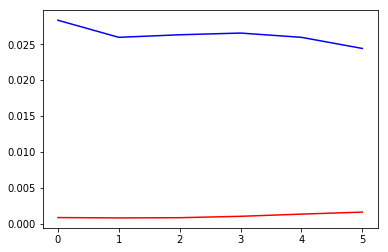

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False)
X_train1, X_test1 = PrincipalComponents(0.81)
print(X_test1.shape, X_train1.shape)

X_train1 = poly.fit_transform(X_train1)
X_test1 = poly.transform(X_test1)

print(X_test1.shape, X_train1.shape)

sigma = np.std(X_train1, axis = 0)
mean = np.mean(X_train1, axis = 0)

X_train1 = normalize(sigma , mean , X_train1)
X_test1 = normalize(sigma , mean, X_test1)

J1 = []
J2 = []
for i in range(25000, X_train1.shape[0], 1500):
    score1, score2, Prediction = LogisticRegression(X_train1[:i+1,:], 
                                                    y_train[:i+1, ], X_test1[:i+1,:], y_test[:i+1],0.1)
    J1.append(1-score1)
    J2.append(1-score2)
    
    
plt.plot(J2, 'b-')
plt.plot(J1, 'r-')
plt.show()

** We got way better accuracy here and is data over  fitting .... may be but since we are getting good result on cross validation data also, It's gud to go with this.**

#### Saving data trained with logistic regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(include_bias = False)

X1 = X.copy()
Test1 = Test.copy()

pca = PCA(n_components= 0.8388)
X1 = pca.fit_transform(X1)
Test1 = pca.transform(Test)

print(X1.shape, Test1.shape)

X1 = poly.fit_transform(X1)
Test1 = poly.fit_transform(Test1)

print(X1.shape, Test1.shape)

sigma = np.std(X1, axis = 0)
mean = np.mean(X1, axis = 0)

X1 = normalize(sigma, mean, X1)
Test1 = normalize(sigma , mean, Test1)
print(X1.shape, Test1.shape)


regr = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000, C=0.1)
regr.fit(X1, Y)
score1 = regr.score(X1, Y)
print(score1)
Prediction = regr.predict(Test1)
image_id = np.arange(1,Prediction.shape[0]+1)
pd.DataFrame({"ImageId": image_id, "Label": Prediction}).to_csv('out_reg1.csv', 
                                                                      index=False, header=True)

(42000, 51) (28000, 51)
(42000, 1377) (28000, 1377)
(42000, 1377) (28000, 1377)
0.999476190476


#### I submitted the data and got an accuracy of 0.9815. Now we will try to train data with SVM and kernel = 'rbf'. Note we will not use polynomial features with SVM since SVM maps the data in higher dimensions so there is no point in including the polynomial features, also SVM doesn't perform well with too many features.

##### 2.SVM

(8400, 43) (33600, 43)
0.9998800048 0.977976190476
0.99992453115 0.978452380952
0.99992857398 0.978095238095
0.999796617064 0.979404761905
0.999774200832 0.979166666667
0.999784622012 0.980119047619


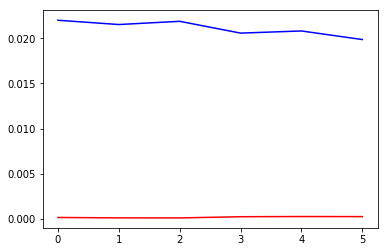

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

def supportVM(X_train2, y_train2, X_test2, y_test2, penalty):
    regr = SVC(kernel ='rbf', C=penalty)
    regr.fit(X_train2, y_train2)
    score1 = regr.score(X_train2, y_train2)
    score2 = regr.score(X_test2, y_test2)
    print(score1, score2)
    Prediction = regr.predict(X_test2)
    return score1, score2, Prediction

X_train1, X_test1 = PrincipalComponents(0.81)
print(X_test1.shape, X_train1.shape)

sigma = np.std(X_train1, axis = 0)
mean = np.mean(X_train1, axis = 0)

X_train1 = normalize(sigma , mean , X_train1)
X_test1 = normalize(sigma , mean, X_test1)

J1 = []
J2 = []
for i in range(25000, X_train1.shape[0], 1500):
    score1, score2, Prediction = supportVM(X_train1[:i+1,:], 
                                                    y_train[:i+1, ], X_test1[:i+1,:], y_test[:i+1],10)
    J1.append(1-score1)
    J2.append(1-score2)
    
plt.plot(J2, 'b-')
plt.plot(J1, 'r-')
plt.show()

- So it seems that this model is performin a little bit better, So we will go with it, Let's save the prediction and save it.

##### Saving prediction trained with SVM

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
# poly = PolynomialFeatures(include_bias = False)

X1 = X.copy()
Test1 = Test.copy()

pca = PCA(n_components= 0.8388)
X1 = pca.fit_transform(X1)
Test1 = pca.transform(Test)

print(X1.shape, Test1.shape)


print(X1.shape, Test1.shape)

sigma = np.std(X1, axis = 0)
mean = np.mean(X1, axis = 0)

X1 = normalize(sigma, mean, X1)
Test1 = normalize(sigma , mean, Test1)
print(X1.shape, Test1.shape)


regr = SVC(kernel ='rbf', C=10)
regr.fit(X1, Y)
score1 = regr.score(X1, Y)
print(score1)
Prediction = regr.predict(Test1)
Prediction = regr.predict(Test1)
image_id = np.arange(1,Prediction.shape[0]+1)
pd.DataFrame({"ImageId": image_id, "Label": Prediction}).to_csv('out_svm.csv', 
                                                                      index=False, header=True)

(42000, 51) (28000, 51)
(42000, 51) (28000, 51)
(42000, 51) (28000, 51)
0.999928571429


** I got an accuracy of 0.98442 on leaderboad with above model**.
I am learning CNN, So in future I will use that to train data and most probably I will launch a kernel also .Please give your valuable feedback.